Step 1: Data Loading, Presentation, and Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

Downloading the Iris dataset

In [28]:
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

Representation of a dataset as arrays

In [29]:
print(f"Data size: {data.shape}")
print(f"Size of the target variable: {target.shape}")

Data size: (150, 4)
Size of the target variable: (150,)


Size in memory

In [30]:
print(f"The size of the data in memory (bytes): {data.nbytes}")
print(f"The size of the target variable in memory (bytes): {target.nbytes}")

The size of the data in memory (bytes): 4800
The size of the target variable in memory (bytes): 1200


Data normalization

In [31]:
min_vals = data.min(axis=0)
max_vals = data.max(axis=0)
normalized_data = (data - min_vals) / (max_vals - min_vals)

Categorization of a single feature

In [38]:
feature_to_categorize = normalized_data[:, 0]
quantiles = np.quantile(feature_to_categorize, [0.25, 0.75])
categorized_feature = pd.cut(feature_to_categorize, bins=[-np.inf, quantiles[0], quantiles[1], np.inf], labels=['small', 'medium', 'big'])

Calling pd.cut and checking the type

In [37]:
#categorized_feature = pd.cut(feature_to_categorize, bins=[-np.inf, quantiles[0], quantiles[1], np.inf], labels=['small', 'medium', 'big'])
#print(type(categorized_feature))

Converting to a NumPy array

In [41]:

categorized_feature_array = categorized_feature.codes.astype(int)

Saving the processed data

In [43]:
np.save('normalized_data.npy', normalized_data)
np.save('target.npy', target)
np.save('categorized_feature.npy', categorized_feature_array)
np.save('feature_names.npy', np.array(feature_names))
print("The processed data is saved.")

The processed data is saved.


Step 2: Classification and Experiments

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

Uploading data

In [45]:
normalized_data = np.load('normalized_data.npy')
target = np.load('target.npy')
categorized_feature = np.load('categorized_feature.npy')
feature_names = np.load('feature_names.npy')

Data separation

In [46]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=42)

Experiment 1: SVC with normalized data

In [47]:
model_1 = SVC()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
print("Experiment 1: SVC with normalized data")
print(classification_report(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))

Experiment 1: SVC with normalized data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Experiment 2: SVC without normalization

In [48]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_2 = SVC()
model_2.fit(X_train_scaled, y_train)
y_pred_2 = model_2.predict(X_test_scaled)
print("\nExperiment 2: SVC without normalization")
print(classification_report(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))


Experiment 2: SVC without normalization
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Experiment 3: Changing the hyperparameter C in the SVC

In [49]:
model_3 = SVC(C=10)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
print("\nExperiment 3: SVC with C=10")
print(classification_report(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))


Experiment 3: SVC with C=10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Step 3: Visualization using PCA and t-SNE

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns

Uploading data

In [55]:
normalized_data = np.load('normalized_data.npy')
target = np.load('target.npy')
categorized_feature = np.load('categorized_feature.npy')
feature_names = np.load('feature_names.npy')

Train a model

In [ ]:
model = SVC(kernel='linear', C=1) 
model.fit(normalized_data, target)

Make predictions

In [ ]:
predicted_target = model.predict(normalized_data)

PCA

In [52]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

t-SNE

In [58]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
tsne_results = tsne.fit_transform(normalized_data)

Visualization

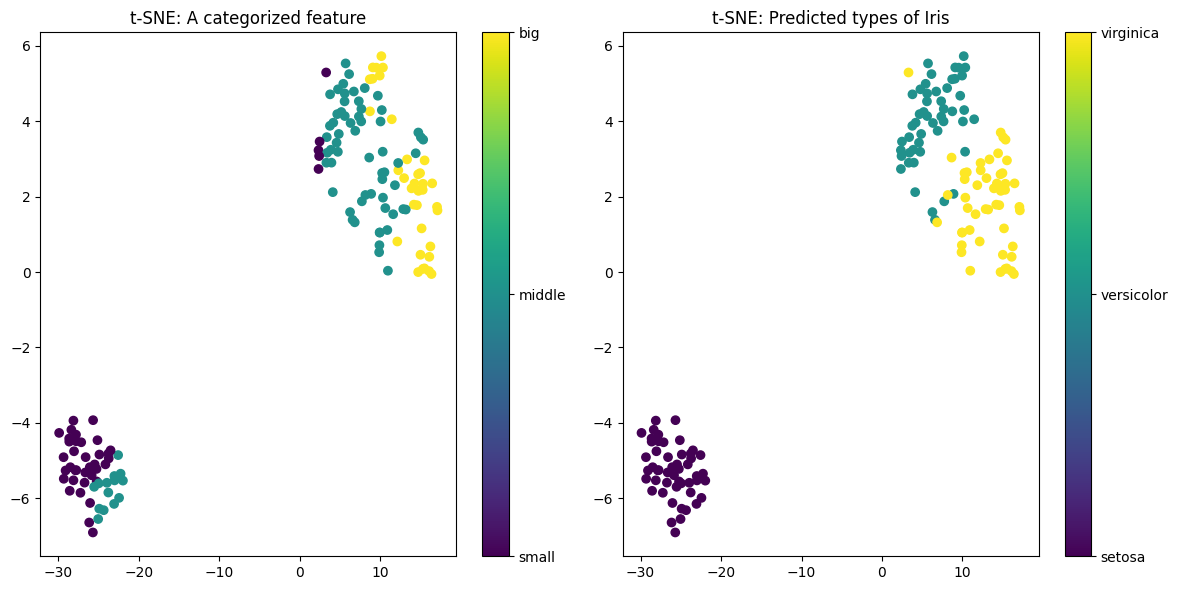

In [69]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=categorized_feature, cmap='viridis')
plt.title('t-SNE: A categorized feature')
cbar = plt.colorbar(ticks=np.arange(3))
cbar.ax.set_yticklabels(['small', 'middle', 'big'])

plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=target, cmap='viridis')
plt.title('t-SNE: Predicted types of Iris')
cbar = plt.colorbar(ticks=np.arange(3))
cbar.ax.set_yticklabels(['setosa', 'versicolor', 'virginica'])

plt.tight_layout()
plt.show()